# Brooklyn Nine-Nine Meets Data Science

The purpose of this jupyter notebook is to perform exploratory data analysis and sentiment analysis on the pilot episode script of Brooklyn Nine-Nine

In [1]:
# Import Packages 

import pandas as pd
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob # for sentiment analysis
from collections import Counter 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load Dataset

df = pd.read_csv('brooklyn-99.csv',encoding='utf-8')

In [3]:
# Provides Concise Summary of our Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 2 columns):
character    304 non-null object
text         304 non-null object
dtypes: object(2)
memory usage: 4.9+ KB


In [4]:
# Remove Characters that have less than 2 lines

df = df[df['character'] != 'PARROT']
df = df[df['character'] != 'AHMED']
df = df[df['character'] != 'BUNDER']
df = df[df['character'] != 'OLD MAN']
df = df[df['character'] != 'BRJKOL']

# Which character has the most lines?

Text(0.5, 1.0, 'Brooklyn 99: Character Line Count')

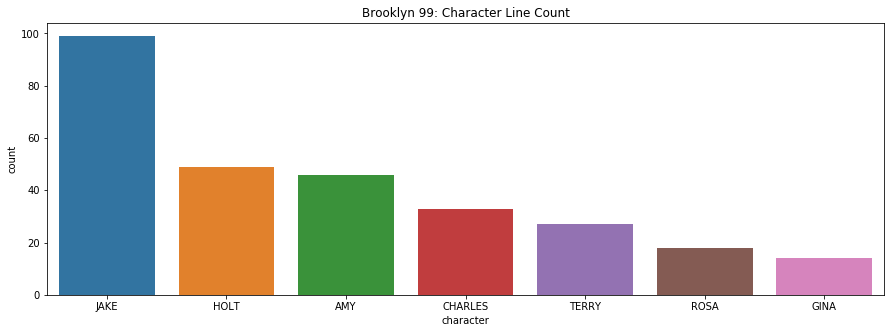

In [5]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'character', data = df, order = df.character.value_counts().iloc[:7].index)
plt.title('Brooklyn 99: Character Line Count')

# Which character uses the most words on average?

In [6]:
# Create Word Count Column

df['word_count'] = df['text'].str.split().str.len()

Text(0.5, 1.0, 'Brooklyn 99: Average Character Word Counts')

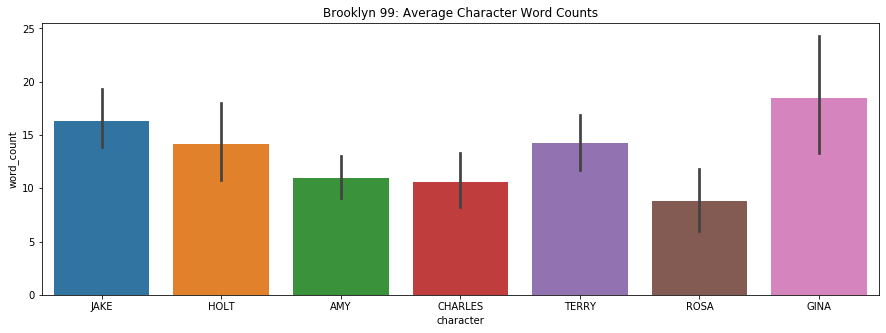

In [7]:
plt.figure(figsize=(15,5))
sns.barplot(x='character',y='word_count',data=df, order = df.character.value_counts().iloc[:7].index)
plt.title('Brooklyn 99: Average Character Word Counts')

# Which character uses the most words in total?

In [8]:
total_sum = df.groupby(['character'])['word_count'].sum().reset_index()

In [9]:
total_sum = total_sum.sort_values(by='word_count', ascending=False)

Text(0.5, 1.0, 'Brooklyn 99: Total Character Word Counts')

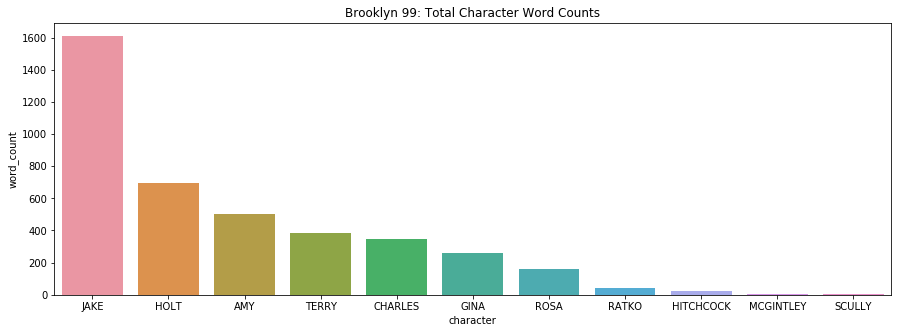

In [10]:
plt.figure(figsize=(15,5))
sns.barplot(x='character',y='word_count',data=total_sum)
plt.title('Brooklyn 99: Total Character Word Counts')

In [11]:
# Clean and Normalize Text
# - tokenize
# - lowercase
# - remove punctuation
# - remove alphanumeric characters
# - remove stopwords

stopwords = set(stopwords.words('english'))

def clean(text):
    text = word_tokenize(text)
    text = [word.lower() for word in text]
    punct = str.maketrans('', '', string.punctuation) 
    text = [word.translate(punct) for word in text] 
    text = [word for word in text if word.isalpha()]
    text = [word for word in text if not word in stopwords]
    return " ".join(text)

df['clean_text'] = df['text'].apply(clean)

In [12]:
# Create Word Count Column for Clean Text

df['clean_word_count'] = df['clean_text'].str.split().str.len()

# Total Words vs Clean Words

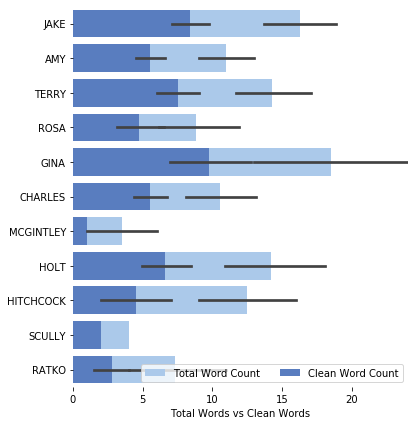

In [13]:
f, ax = plt.subplots(figsize=(6, 7))

sns.set_color_codes("pastel")
sns.barplot(x="word_count", y="character", data=df,
            label="Total Word Count", color="b")

sns.set_color_codes("muted")
sns.barplot(x="clean_word_count", y="character", data=df,
            label="Clean Word Count", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Total Words vs Clean Words")
sns.despine(left=True, bottom=True)

In [14]:
# Apply Sentiment Polarity to Text with TextBlob

df['polarity'] = [round(TextBlob(word).sentiment.polarity, 2) for word in df['clean_text']]
df['sentiment'] = ['positive' if polarity > 0 
                             else 'negative' if polarity < 0 
                                 else 'neutral' 
                                     for polarity in df['polarity']]


# What is the sentiment of our character's lines

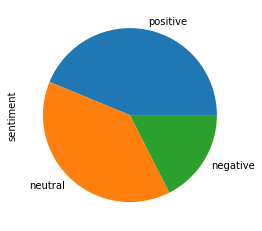

In [15]:
df.sentiment.value_counts().plot(kind='pie')

Text(0.5, 1.0, 'Brooklyn 99: Character Clean Text Sentiment')

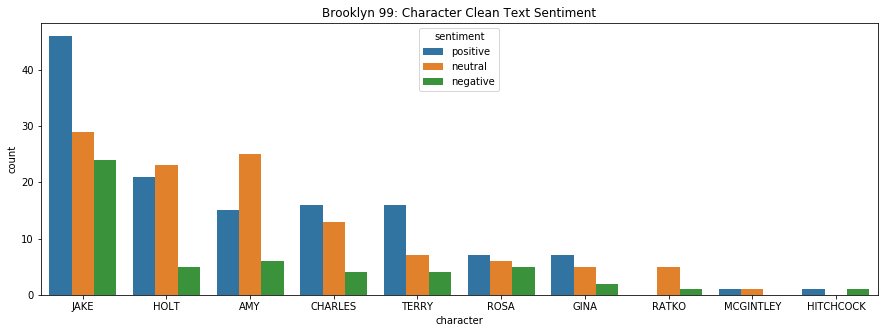

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(x='character',hue='sentiment',data=df,order=df.character.value_counts().iloc[:10].index)
plt.title('Brooklyn 99: Character Clean Text Sentiment')

In [17]:
# Build a counter function to count words

def counter(text):
    cnt = Counter()
    for msgs in text:
        for msg in msgs:
            cnt[msg] += 1
    return cnt

In [18]:
# Isolate Jake's Lines and use Counter to determine the Most Common Words

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

jake = df.groupby('character')
jake = jake.get_group(('JAKE'))
jake['clean_text'] = jake['clean_text'].apply(lambda x: word_tokenize(x))
text_cnt = counter(jake['clean_text'])
j = text_cnt.most_common()

# What are Jake's Most Common Words

Text(0.5, 1.0, "Jake's Most Common Words")

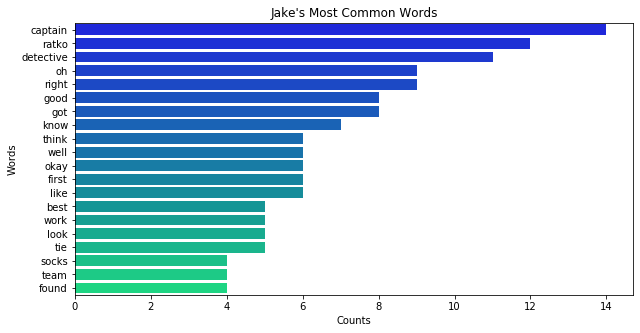

In [19]:
j = pd.DataFrame(j, columns = ['Words', 'Counts'])
j = j.sort_values(by='Counts', ascending=False)[:20]

colors = sns.color_palette("winter", len(j))
plt.figure(figsize=(10,5))
sns.barplot(y = 'Words' , x = 'Counts', data=j, palette=colors)
plt.title('''Jake's Most Common Words''')

In [20]:
# Now let's check out Gina and Holt's Most Common Words

gina = df.groupby('character')
gina = gina.get_group(('GINA'))
gina['clean_text'] = gina['clean_text'].apply(lambda x: word_tokenize(x))
gina_cnt = counter(gina['clean_text'])

holt = df.groupby('character')
holt = holt.get_group(('HOLT'))
holt['clean_text'] = holt['clean_text'].apply(lambda x: word_tokenize(x))
holt_cnt = counter(holt['clean_text'])

g = gina_cnt.most_common()
h = holt_cnt.most_common()


# What are Gina's Most Common Words

Text(0.5, 1.0, "Gina's Most Common Words")

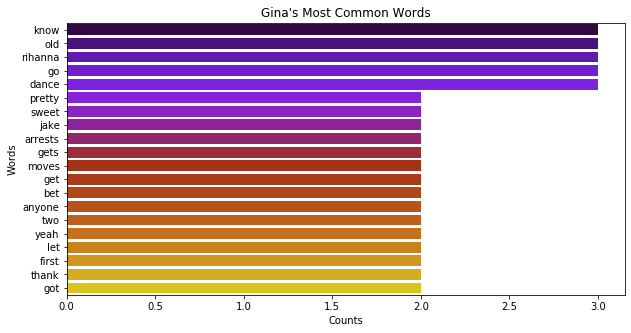

In [21]:
g = pd.DataFrame(g, columns = ['Words', 'Counts'])
g = g.sort_values(by='Counts', ascending=False)[:20]
colors = sns.color_palette("gnuplot", len(g))
plt.figure(figsize=(10,5))
sns.barplot(y = 'Words' , x = 'Counts', data=g, palette=colors)
plt.title('''Gina's Most Common Words''')

# What are Holt's Most Common Words

Text(0.5, 1.0, "Holt's Most Common Words")

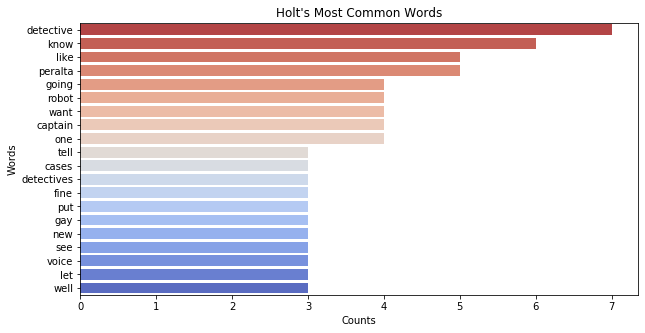

In [22]:
h = pd.DataFrame(h, columns = ['Words', 'Counts'])
h = h.sort_values(by='Counts', ascending=False)[:20]

colors = sns.color_palette("coolwarm_r", len(h))
plt.figure(figsize=(10,5))
sns.barplot(y = 'Words' , x = 'Counts', data=h, palette=colors)
plt.title('''Holt's Most Common Words''')